### Ejercicio 15: Vacunas

Una compañía distribuidora de vacunas dispone de un total de un millón de vacunas para repartir en España. Las vacunas llegan a través de Barajas, por lo que tienen un coste asociado al transporte hasta el lugar de su utilización (en euros por dosis). Cada comunidad autónoma tiene un número de individuos susceptibles de ser vacunados y realiza una oferta por dosis de vacuna (en euros por dosis). El requisito del Gobierno para que se comercialicen las vacunas es que al menos se vacune al 15% de la población susceptible en cada territorio. No se desea vacunar a más del 40% de la población de un territorio, puesto que ya se considera conseguida la inmunidad de grupo. ¿Cuál es el beneficio máximo que puede obtener la empresa? Los datos por comunidades autónomas están recogidos en el Excel adjunto “DatosVacunas.xlsx”

#### Importamos Pyomo

In [18]:
from pyomo.environ import *
import pandas as pd


In [19]:
df = pd.read_excel('Datos/DatosVacunas.xlsx',index_col=0)
df

,Individuos susceptibles,Unnamed: 2,Unnamed: 3,Pagan (eur/dosis),Unnamed: 5,Unnamed: 6,Transporte (eur/dosis)
Aragon,322000,NaN,Aragon,57,NaN,Aragon,3.2
Asturias,111000,NaN,Asturias,27,NaN,Asturias,5.7
Baleares,141000,NaN,Baleares,13,NaN,Baleares,14.4
Canarias,63000,NaN,Canarias,52,NaN,Canarias,24.7
Cantabria,77000,NaN,Cantabria,51,NaN,Cantabria,5.1
CastillaLeon,451000,NaN,CastillaLeon,39,NaN,CastillaLeon,3.1
CastillaLaMancha,487000,NaN,CastillaLaMancha,96,NaN,CastillaLaMancha,2.4
Cataluña,822000,NaN,Cataluña,59,NaN,Cataluña,6.3
ComValenciana,744000,NaN,ComValenciana,77,NaN,ComValenciana,4.5
Extremadura,156000,NaN,Extremadura,82,NaN,Extremadura,5.3


In [20]:
susceptibles = df['Individuos susceptibles']
pagan = df['Pagan (eur/dosis)']
transp = df['Transporte (eur/dosis)']
comunidades = df.index.values.tolist()

In [21]:
df.index.values.tolist()

['Aragon',
 'Asturias',
 'Baleares',
 'Canarias',
 'Cantabria',
 'CastillaLeon',
 'CastillaLaMancha',
 'Cataluña',
 'ComValenciana',
 'Extremadura',
 'Galicia',
 'ComMadrid',
 'Murcia',
 'Navarra',
 'PaisVasco',
 'Rioja',
 'Ceuta',
 'Melilla']

#### Creamos un problema concreto, es decir, un objeto de la clase problema que ya contenga parámetros

In [22]:
model = ConcreteModel()

#### Necesitamos utilizar sets

In [23]:
model.com=Set(initialize=comunidades)
model.com.pprint()

com : Size=1, Index=None, Ordered=Insertion
    Key  : Dimen : Domain : Size : Members
    None :     1 :    Any :   18 : {'Aragon', 'Asturias', 'Baleares', 'Canarias', 'Cantabria', 'CastillaLeon', 'CastillaLaMancha', 'Cataluña', 'ComValenciana', 'Extremadura', 'Galicia', 'ComMadrid', 'Murcia', 'Navarra', 'PaisVasco', 'Rioja', 'Ceuta', 'Melilla'}


#### Definimos las variables

In [24]:
model.vacunas=Var(model.com,within=NonNegativeReals)

#### Definimos la función objetivo

In [25]:
model.obj = Objective(expr = sum(model.vacunas[c]*(pagan[c]-transp[c]) for c in model.com ), sense=maximize)

#### Definimos la restricciones

In [26]:
model.minvac = ConstraintList()
for c in model.com:
    model.minvac.add(
        model.vacunas[c]>=0.15*susceptibles[c]
    )

model.maxvac = ConstraintList()
for c in model.com:
    model.maxvac.add(
        model.vacunas[c]<=0.4*susceptibles[c]
    )

model.totalvacunas = Constraint(expr = sum(model.vacunas[c] for c in model.com)<=1000000)


#### Resolvemos el problema

In [27]:
results = SolverFactory('glpk').solve(model)
#model.pprint()
results.write()   

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 60084015.0
  Upper bound: 60084015.0
  Number of objectives: 1
  Number of constraints: 38
  Number of variables: 19
  Number of nonzeros: 55
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.025701045989990234
# ----------------------------------------------------------
#   Solution Information
# -----------------------

#### Exportamos a Excel

In [28]:
df2=pd.DataFrame.from_dict(model.vacunas.extract_values(),orient='index')
df2.to_excel('Resultados/Result_Vacunas.xlsx')
df2

,0
Aragon,48300.0
Asturias,16650.0
Baleares,21150.0
Canarias,9450.0
Cantabria,11550.0
CastillaLeon,67650.0
CastillaLaMancha,194800.0
Cataluña,123300.0
ComValenciana,111600.0
Extremadura,23400.0


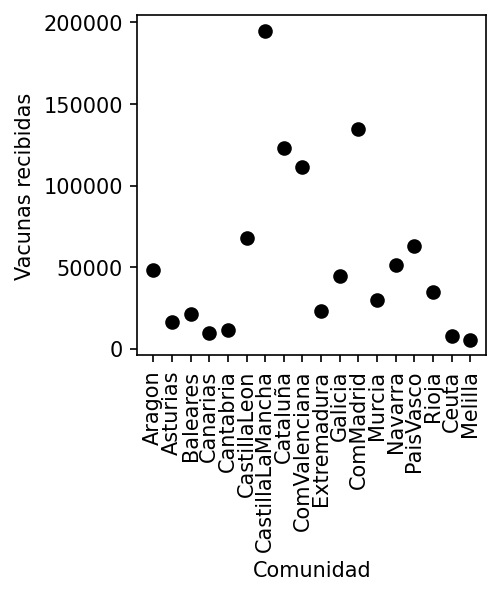

In [29]:
vac=df2.to_numpy()
vac
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3, 3), dpi=150)
plt.plot(comunidades,vac,'o',color='black')
plt.xticks(rotation=90)
plt.xlabel('Comunidad')
plt.ylabel('Vacunas recibidas')
plt.savefig('Resultados/figuravacunas.svg')
